<a href="https://colab.research.google.com/github/Mingyang0816/KPMG-Data-Analytics/blob/main/KPMG_Data_Analysis_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Datasets



In [607]:
# Authenticate Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [608]:
# Import all 4 datasets
import pandas as pd

file_path = '/content/drive/My Drive/KPMG_Data_Analysis/KPMG_Dataset.xlsx'
transactions_df = pd.read_excel(file_path, 'Transactions')
new_customer_df = pd.read_excel(file_path, 'NewCustomerList')
demographic_df = pd.read_excel(file_path, 'CustomerDemographic')
address_df = pd.read_excel(file_path, 'CustomerAddress')

#Transactions Dataset

In [609]:
# Change header to top row
new_header = transactions_df.iloc[0]
transactions_df = transactions_df[1:]
transactions_df.columns = new_header
transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


###Summary of Data

In [610]:
# Summary of info
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [611]:
# Statistical summary
transactions_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


###Missing & Duplicate Values

In [612]:
# Check number of missing values
transactions_df.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [613]:
# Find all rows of data with missing values
null_values = transactions_df[transactions_df.isna().any(axis = 1)]
null_values.shape[0]
null_values

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
98,98,49,333,2017-06-23 00:00:00,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823
137,137,0,431,2017-09-23 00:00:00,False,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
160,160,0,3300,2017-08-27 00:00:00,False,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
167,167,90,3177,2017-04-26 00:00:00,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482
170,170,6,404,2017-10-16 00:00:00,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19636,19636,98,1389,2017-07-26 00:00:00,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002
19794,19794,0,2860,2017-01-13 00:00:00,False,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19844,19844,3,8,2017-01-28 00:00:00,NaN,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,37823
19860,19860,0,2468,2017-06-24 00:00:00,True,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


In [614]:
# Check number of duplicate values
transactions_df.duplicated().sum()

0

###Values in each column

In [615]:
transactions_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=0)

In [616]:
transactions_df["online_order"].value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [617]:
transactions_df["order_status"].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [618]:
transactions_df["brand"].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [619]:
transactions_df["product_line"].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [620]:
transactions_df["product_class"].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [621]:
transactions_df["product_size"].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [622]:
transactions_df["list_price"].value_counts()

2091.47    465
1403.50    396
71.49      274
1231.15    235
1890.39    233
          ... 
56.21        1
126.36       1
1300.96      1
1697.27      1
867.92       1
Name: list_price, Length: 296, dtype: int64

In [623]:
transactions_df["standard_cost"].value_counts()

388.920000    465
954.820000    396
53.620000     274
161.600000    235
260.140000    233
             ... 
151.960000    124
206.350000    114
312.735016      1
270.299988      1
667.400024      1
Name: standard_cost, Length: 103, dtype: int64

In [624]:
# Retrieve non-null values in standard_cost column
new_df = transactions_df[transactions_df['standard_cost'].notnull()]

# Calculate decimal places for each standard_cost value
new_df['decimals'] = new_df['standard_cost'].map(lambda x: str(x).split('.')[1]).apply(len)

# Find rows with standard_cost value of more than 2 decimal places
new_df['decimals'].astype(int)
new_df[new_df['decimals'] > 2]

<ipython-input-624-2839a78c1891>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['decimals'] = new_df['standard_cost'].map(lambda x: str(x).split('.')[1]).apply(len)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,decimals
8708,8708,0,5034,2017-10-07 00:00:00,False,Approved,Solex,Road,medium,medium,416.98,312.735016,42218,7
16701,16701,0,5034,2017-01-27 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,360.4,270.299988,35667,7
17469,17469,0,5034,2017-01-03 00:00:00,False,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,33879,7


**The "standard_cost" column contains decimals with more than 2 decimal places, which definitely cannot be a price value.**

In [625]:
transactions_df["product_first_sold_date"].value_counts()

33879    234
41064    229
37823    227
39880    222
38216    220
        ... 
41848    169
42404    168
41922    166
37659    163
34586    162
Name: product_first_sold_date, Length: 100, dtype: int64

**The "product_first_sold_date" column contains integers instead of datetime values.**

#Customer Demographic Dataset

In [626]:
# Change header to top row
new_header = demographic_df.iloc[0]
demographic_df = demographic_df[1:]
demographic_df.columns = new_header
demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


###Summary of Data

In [627]:
# Summary of info
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [628]:
# Statistical summary
demographic_df.describe()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
count,4000,4000,3875,4000,4000,3913,3494,3344,4000,4000,3698,4000,3913
unique,4000,3139,3725,6,100,3448,195,9,3,2,90,2,22
top,1,Max,Pristnor,Female,16,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes,7
freq,1,5,3,2037,56,7,45,799,2000,3998,113,2024,235


###Missing and Duplicate Values

In [629]:
# Check number of missing values
demographic_df.isnull().sum()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [630]:
# Find all rows of data with missing values
null_values = demographic_df[demographic_df.isna().any(axis = 1)]
null_values.shape[0]
null_values

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8
6,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13
7,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11
8,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,3986,Oralle,Petrello,Female,1,1976-12-01 00:00:00,Social Worker,Health,Mass Customer,N,NaN,No,21
3987,3987,Beckie,Wakeham,Female,18,1964-05-29 00:00:00,NaN,Argiculture,Mass Customer,N,á,No,7
3998,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3999,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10


In [631]:
# Check number of duplicate values
demographic_df.duplicated().sum()

0

###Values in each column

In [632]:
demographic_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object', name=0)

In [633]:
demographic_df['first_name'].value_counts()

Max         5
Tobe        5
Timmie      5
Kippy       4
Pail        4
           ..
Katy        1
Hakim       1
Fanchon     1
Jeanette    1
Sarene      1
Name: first_name, Length: 3139, dtype: int64

In [634]:
demographic_df['last_name'].value_counts()

Pristnor     3
Ramsdell     3
Eager        2
Zisneros     2
Dredge       2
            ..
Whittock     1
Carwithen    1
Blas         1
Dearlove     1
Oldland      1
Name: last_name, Length: 3725, dtype: int64

In [635]:
demographic_df['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

**The "gender" column contains multiple expressions with the same meaning, such as Female, Femal and F, which can all be grouped under Female.**

In [636]:
# Replace values with same meaning
demographic_df['gender'] = demographic_df['gender'].replace(["F", "Femal"], "Female")
demographic_df['gender'] = demographic_df['gender'].replace(["M"], "Male")

In [637]:
demographic_df['gender'].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [638]:
demographic_df['past_3_years_bike_related_purchases'].value_counts()

16    56
19    56
67    54
20    54
2     50
      ..
8     28
95    27
85    27
86    27
92    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

In [639]:
demographic_df['DOB'].value_counts()

1978-01-30    7
1964-07-08    4
1962-12-17    4
1978-08-19    4
1977-05-13    4
             ..
1989-06-16    1
1998-09-30    1
1985-03-11    1
1989-10-23    1
1991-11-05    1
Name: DOB, Length: 3448, dtype: int64

In [640]:
# Find rows with earliest Date of Birth
demographic_df['DOB'] = pd.to_datetime(demographic_df['DOB'])
demographic_df.sort_values(by="DOB", inplace = True)
demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
34,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20
720,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6
1092,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5
3410,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16
2413,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17


**The "DOB" column contains an outlier, since a person born in 1843 will be 180 years old now, which is not feasible.**

In [641]:
# Remove outlier
demographic_df = demographic_df.drop(demographic_df[demographic_df['DOB'] == '1843-12-21'].index)

In [642]:
demographic_df['job_title'].value_counts()

Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Human Resources Assistant IV             4
Research Assistant III                   3
Health Coach I                           3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [643]:
demographic_df['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    222
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [644]:
demographic_df['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     978
Name: wealth_segment, dtype: int64

In [645]:
demographic_df['deceased_indicator'].value_counts()

N    3997
Y       2
Name: deceased_indicator, dtype: int64

In [646]:
demographic_df['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
â°â´âµâââ                                  53
                                         ... 
<img src=x onerror=alert('hi') />          31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

**The "Default" column contains a bunch of gibberish values, hence it should be deleted.**

In [647]:
demographic_df['owns_car'].value_counts()

Yes    2024
No     1975
Name: owns_car, dtype: int64

In [648]:
demographic_df['tenure'].value_counts()

7     235
5     228
11    221
10    218
16    215
8     211
18    208
12    202
9     200
14    200
6     192
13    191
4     191
17    182
15    179
1     166
3     160
19    159
2     150
20     95
22     55
21     54
Name: tenure, dtype: int64

#Customer Address Dataset

In [649]:
# Change header to top row
new_header = address_df.iloc[0]
address_df = address_df[1:]
address_df.columns = new_header
address_df.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


### Summary of Data

In [650]:
# Summary of info
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [651]:
# Statistical summary
address_df.describe()

,customer_id,address,postcode,state,country,property_valuation
count,3999,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1,12
top,1,3 Mariners Cove Terrace,2170,NSW,Australia,9
freq,1,2,31,2054,3999,647


### Missing and Duplicate Values

In [652]:
# Check number of missing values
address_df.isnull().sum()

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [653]:
# Check number of duplicate values
address_df.duplicated().sum()

0

### Values in each column

In [654]:
address_df.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object', name=0)

In [655]:
address_df['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

**The "state" column contains multiple expressions with the same meaning, such as NSW and New South Wales, which can all be grouped under NSW.**

In [656]:
# Replace values with same meaning
address_df['state'] = address_df['state'].replace("New South Wales", "NSW")
address_df['state'] = address_df['state'].replace("Victoria", "VIC")

In [657]:
address_df['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [658]:
address_df['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [659]:
address_df['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

# Data Visualizations

In [660]:
from datetime import datetime, date
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [661]:
demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
720,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6
1092,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5
3410,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16
2413,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17
658,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8


In [662]:
# Drop null values in DOB column
demographic_df = demographic_df.dropna(axis=0, subset=['DOB'])

# Convert DOB to datetime
demographic_df["DOB"] = pd.to_datetime(demographic_df["DOB"])

# Calculate age of customers
today = datetime.today()
demographic_df['age'] = demographic_df['DOB'].apply(lambda x: today.year -3 - x.year - ((today.month, today.day) < (x.month, x.day)))
demographic_df.head()

<ipython-input-662-4881ea0c02ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_df["DOB"] = pd.to_datetime(demographic_df["DOB"])
<ipython-input-662-4881ea0c02ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_df['age'] = demographic_df['DOB'].apply(lambda x: today.year -3 - x.year - ((today.month, today.day) < (x.month, x.day)))


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
720,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6,88
1092,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5,85
3410,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16,80
2413,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17,77
658,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8,76


In [663]:
# Split age of customers into age ranges
demographic_df['age_range'] = pd.cut(demographic_df['age'], bins=[10, 19, 29, 39, 49, 59, 69, 99], labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+'])
demographic_df.head()

<ipython-input-663-548a9993da6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_df['age_range'] = pd.cut(demographic_df['age'], bins=[10, 19, 29, 39, 49, 59, 69, 99], labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+'])


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_range
720,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6,88,70+
1092,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5,85,70+
3410,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16,80,70+
2413,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17,77,70+
658,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8,76,70+


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '10-19'),
  Text(1, 0, '20-29'),
  Text(2, 0, '30-39'),
  Text(3, 0, '40-49'),
  Text(4, 0, '50-59'),
  Text(5, 0, '60-69'),
  Text(6, 0, '70+')])

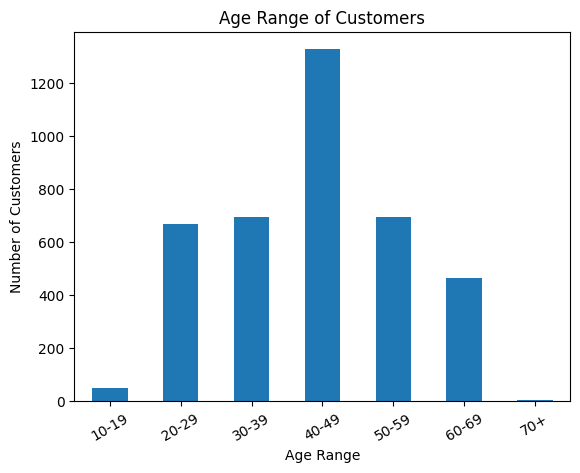

In [664]:
ax = demographic_df.groupby('age_range')['customer_id'].nunique().plot.bar()
ax.set_xlabel("Age Range")
ax.set_ylabel("Number of Customers")
ax.set_title("Age Range of Customers")
plt.xticks(rotation=30, horizontalalignment="center")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Argiculture'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'IT'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Property'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Telecommunications')])

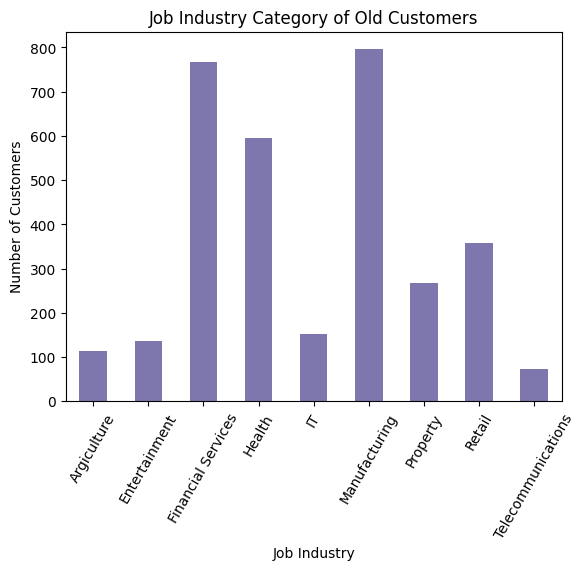

In [665]:
ax = demographic_df.groupby('job_industry_category')['customer_id'].nunique().plot.bar(color = "darkslateblue", alpha = 0.7)
ax.set_xlabel("Job Industry")
ax.set_ylabel("Number of Customers")
ax.set_title("Job Industry Category of Old Customers")
plt.xticks(rotation=60, horizontalalignment="center")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '10-19'),
  Text(1, 0, '20-29'),
  Text(2, 0, '30-39'),
  Text(3, 0, '40-49'),
  Text(4, 0, '50-59'),
  Text(5, 0, '60-69'),
  Text(6, 0, '70+')])

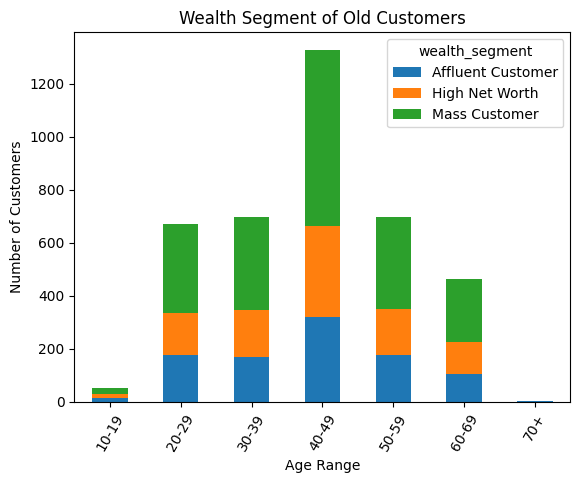

In [666]:
ax = demographic_df.groupby(['age_range', 'wealth_segment']).size().unstack().plot(kind='bar', stacked=True)
ax.set_xlabel("Age Range")
ax.set_ylabel("Number of Customers")
ax.set_title("Wealth Segment of Old Customers")
plt.xticks(rotation=60, horizontalalignment="center")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '10-19'),
  Text(1, 0, '20-29'),
  Text(2, 0, '30-39'),
  Text(3, 0, '40-49'),
  Text(4, 0, '50-59'),
  Text(5, 0, '60-69'),
  Text(6, 0, '70+')])

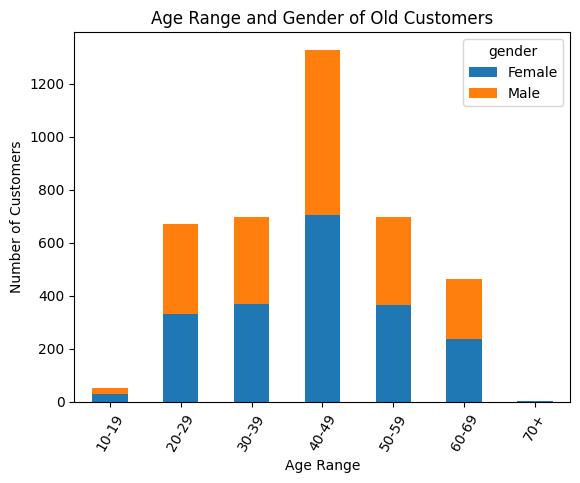

In [667]:
ax = demographic_df.groupby(['age_range', 'gender']).size().unstack().plot(kind='bar', stacked=True)
ax.set_xlabel("Age Range")
ax.set_ylabel("Number of Customers")
ax.set_title("Age Range and Gender of Old Customers")
plt.xticks(rotation=60, horizontalalignment="center")

Text(0.5, 1.0, 'Old Customers from which States?')

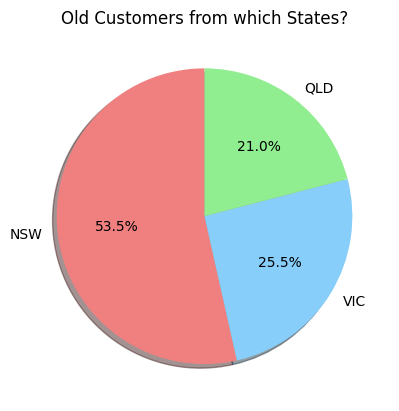

In [668]:
count = address_df['state'].value_counts()
colors_list = ["lightcoral", "lightskyblue", "lightgreen"]
plt.pie(count, labels=count.index, autopct="%1.1f%%", startangle=90, shadow=True, colors=colors_list)
plt.title("Old Customers from which States?")

## New Customer Dataset

In [669]:
# Change header to top row
new_header = new_customer_df.iloc[0]
new_customer_df = new_customer_df[1:]
new_customer_df.columns = new_header
new_customer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.703125


In [670]:
# Drop null values in DOB column
new_customer_df = new_customer_df.dropna(axis=0, subset=['DOB'])

# Convert DOB to datetime
new_customer_df["DOB"] = pd.to_datetime(new_customer_df["DOB"])

# Calculate age of customers
today = datetime.today()
new_customer_df['age'] = new_customer_df['DOB'].apply(lambda x: today.year -3 - x.year - ((today.month, today.day) < (x.month, x.day)))
new_customer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value,age
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875,63
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875,50
3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875,46
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.703125,41
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.703125,55


In [671]:
# Split age of customers into age ranges
new_customer_df['age_range'] = pd.cut(new_customer_df['age'], bins=[10, 19, 29, 39, 49, 59, 69, 99], labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+'])
new_customer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value,age,age_range
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875,63,60-69
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875,50,50-59
3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875,46,40-49
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.703125,41,40-49
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.703125,55,50-59


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '10-19'),
  Text(1, 0, '20-29'),
  Text(2, 0, '30-39'),
  Text(3, 0, '40-49'),
  Text(4, 0, '50-59'),
  Text(5, 0, '60-69'),
  Text(6, 0, '70+')])

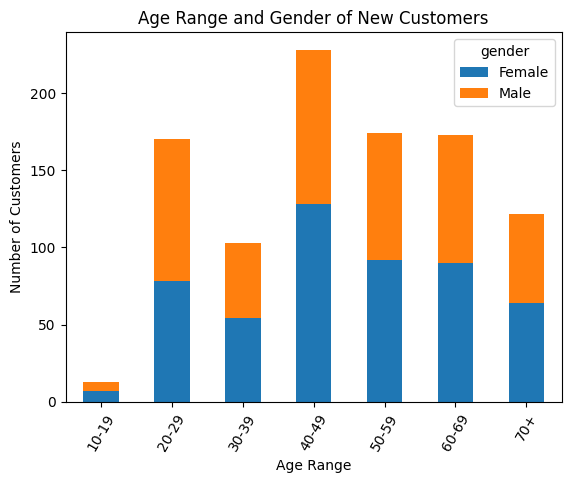

In [672]:
ax = new_customer_df.groupby(['age_range', 'gender']).size().unstack().plot(kind='bar', stacked=True)
ax.set_xlabel("Age Range")
ax.set_ylabel("Number of Customers")
ax.set_title("Age Range and Gender of New Customers")
plt.xticks(rotation=60, horizontalalignment="center")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Argiculture'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'IT'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Property'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Telecommunications')])

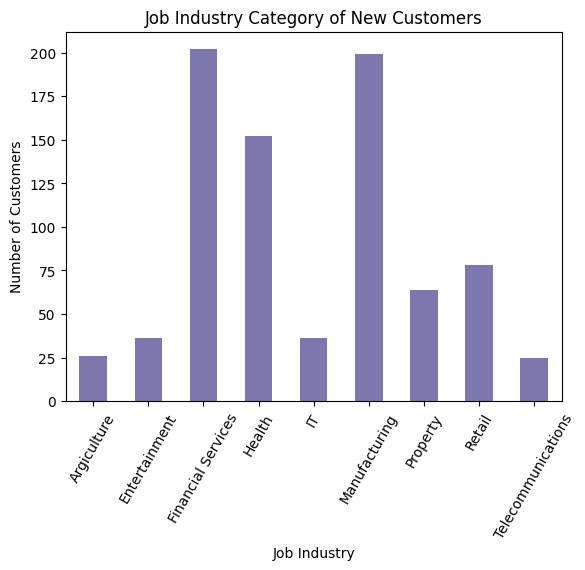

In [673]:
ax = new_customer_df.groupby('job_industry_category').size().plot.bar(color = "darkslateblue", alpha = 0.7)
ax.set_xlabel("Job Industry")
ax.set_ylabel("Number of Customers")
ax.set_title("Job Industry Category of New Customers")
plt.xticks(rotation=60, horizontalalignment="center")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '10-19'),
  Text(1, 0, '20-29'),
  Text(2, 0, '30-39'),
  Text(3, 0, '40-49'),
  Text(4, 0, '50-59'),
  Text(5, 0, '60-69'),
  Text(6, 0, '70+')])

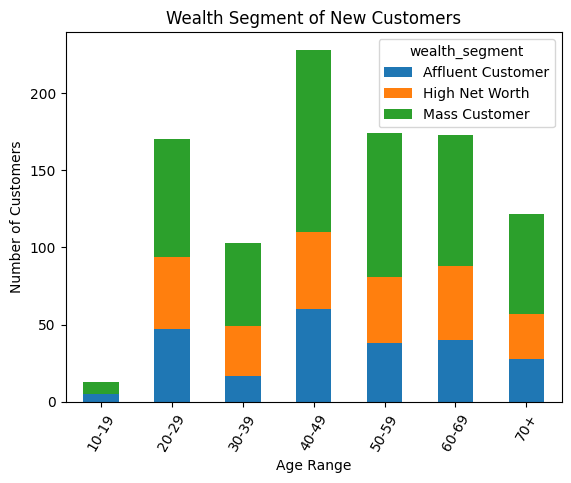

In [674]:
ax = new_customer_df.groupby(['age_range', 'wealth_segment']).size().unstack().plot(kind='bar', stacked=True)
ax.set_xlabel("Age Range")
ax.set_ylabel("Number of Customers")
ax.set_title("Wealth Segment of New Customers")
plt.xticks(rotation=60, horizontalalignment="center")

Text(0.5, 1.0, 'New Customers from which States?')

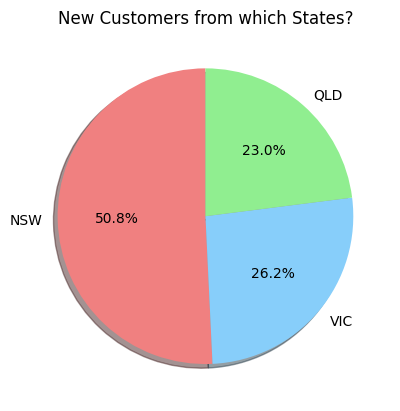

In [675]:
count = new_customer_df['state'].value_counts()
colors_list = ["lightcoral", "lightskyblue", "lightgreen"]
plt.pie(count, labels=count.index, autopct="%1.1f%%", startangle=90, shadow=True, colors=colors_list)
plt.title("New Customers from which States?")